Relationship between solar radio flux F10.7 and sunspot number

Narkas Baimurzina, Skoltech, 2024 
Alina Anisimova, Skoltech, 2024 
Pavel Borisenko, Skoltech, 2024

 1.Import the necessary libraries

In [498]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

2. Read the data

In [499]:
file_path = "data_group1.txt"
data = pd.read_csv(file_path, delim_whitespace=True, names=["year", "month", "flux", "number"])
data

C:\Users\User\AppData\Local\Temp\ipykernel_21972\926524774.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, names=["year", "month", "flux", "number"])


,year,month,flux,number
0,1947,2,202.7,188.9
1,1947,3,235.7,183.8
2,1947,4,264.1,212.1
3,1947,5,261.2,285.0
4,1947,6,226.6,232.1
...,...,...,...,...
821,2015,7,107.0,65.8
822,2015,8,106.5,64.4
823,2015,9,102.0,78.6
824,2015,10,104.0,61.7


In [500]:
# date=[]

# for i in range(len(data['year'])):
#     date.append(str(data['year'][i])+'.'+str(data['month'][i]))

date = []
for i in range(len(data["year"])):
    year_month = datetime.date(data["year"][i], data["month"][i], 1)
    
    date.append(year_month)

3. Make plot monthly mean sunspot number and solar radio flux F10.7 

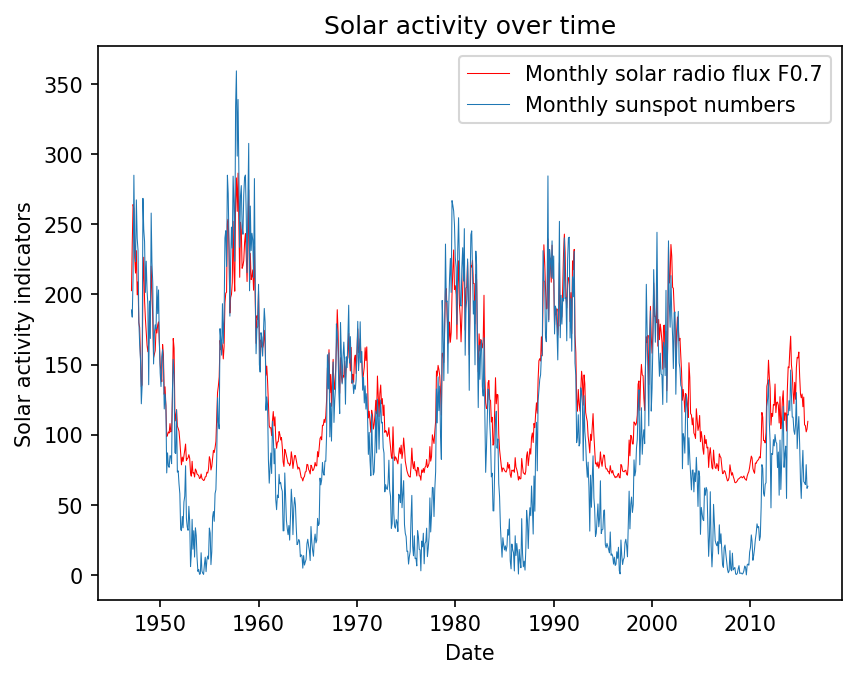

In [501]:
plt.title('Solar activity over time')
plt.plot(date, data["flux"], color='r',linewidth=0.5)
plt.plot(date, data['number'],linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Solar activity indicators')
plt.legend(labels=['Monthly solar radio flux F0.7','Monthly sunspot numbers'])
plt.show()

4. Make scatter plot between monthly mean sunspot number and solar radio flux F10.7 cm

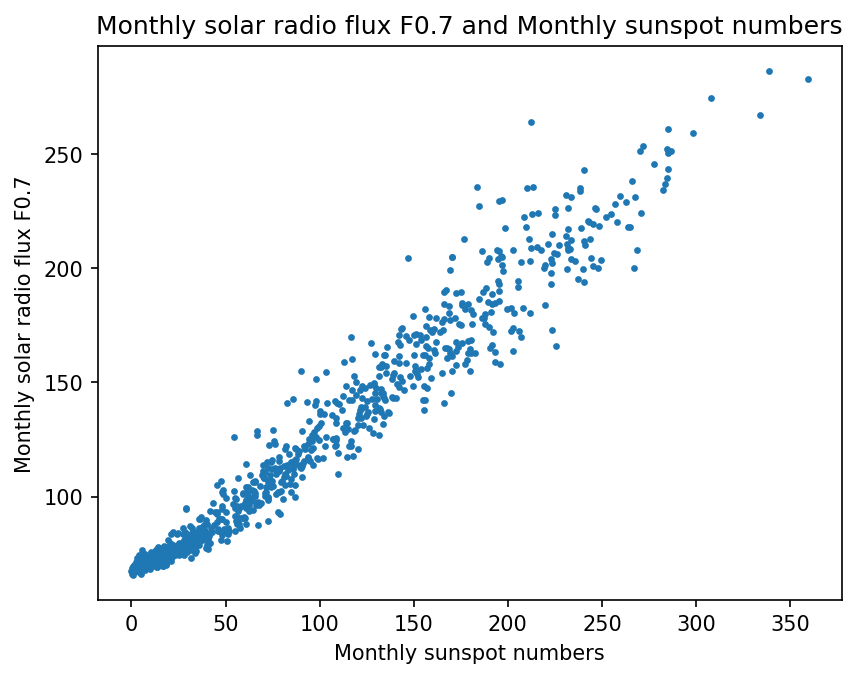

In [502]:
plt.rcParams["figure.dpi"]=150
plt.title('Monthly solar radio flux F0.7 and Monthly sunspot numbers')
plt.scatter(data['number'], data['flux'], s=5)

plt.xlabel('Monthly sunspot numbers')
plt.ylabel('Monthly solar radio flux F0.7')
plt.show()

We can see that as a mean sunspot number quantity increases, solar radio flux also increases

5. Smoothing the data using the 13-month running mean

In [503]:
flux_smooth=[]

n=len(data['flux'])
for i in range(n):
    if i<6:
        flux1=np.mean(data['flux'][0:6])
        flux_smooth.append(flux1)
    elif 6<=i<n-6:
        flux2=1/24*data['flux'][i-6]+1/12*np.sum(data['flux'][(i-5):(i+6)])+1/24*data['flux'][i+6]
        flux_smooth.append(flux2)
    elif i>=n-6:
        flux3=np.mean(data['flux'][n-6:n])
        flux_smooth.append(flux3)


In [504]:
number_smooth=[]

n=len(data['number'])
for i in range(n):
    if i<6:
        number1=np.mean(data['number'][0:6])
        number_smooth.append(number1)
    elif 6<=i<n-6:
        number2=1/24*data['number'][i-6]+1/12*np.sum(data['number'][(i-5):(i+6)])+1/24*data['number'][i+6]
        number_smooth.append(number2)
    elif i>=n-6:
        number3=np.mean(data['number'][n-6:n])
        number_smooth.append(number3)

6. And make a plot with smoothed monthly mean sunspot number and solar radio flux F10.7

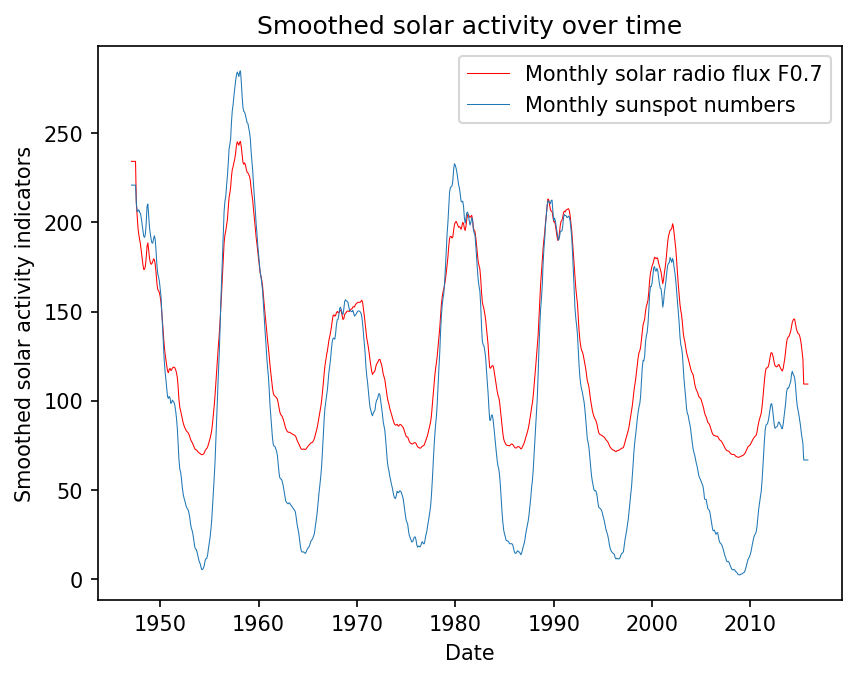

In [505]:
plt.title('Smoothed solar activity over time')
plt.plot(date, flux_smooth, color='r',linewidth=0.5)
plt.plot(date, number_smooth, linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Smoothed solar activity indicators')
plt.legend(labels=['Monthly solar radio flux F0.7','Monthly sunspot numbers'])
plt.show()

7. Make a multi-dimensional linear regression

In [506]:
#vector of regressands (dependent variables) F
F = []
F = flux_smooth.copy()

In [507]:
#the matrix of regressors (independent variables) R
R = []
R1 = np.ones(n)
R2 = np.ones(n)
R3 = np.ones(n)
R4 = np.ones(n)
for i in range(n):
    R2[i] = number_smooth[i]
    R3[i] = number_smooth[i]**2
    R4[i] = number_smooth[i]**3
R = np.column_stack((R1, R2, R3, R4))

In [508]:
#the vector of coefficients B
R_t=np.transpose(R)
Rrt = np.linalg.inv(np.matmul(R_t, R))
Rrtt = np.matmul(Rrt, R_t)
B = np.matmul(Rrtt, F)
B

array([ 6.57969460e+01,  4.61894633e-01,  1.69559436e-03, -4.00159859e-06])

8. Reconstruct the smoothed solar radio flux at 10.7

In [509]:
F_new=B[0]*R1+B[1]*R2+B[2]*R3+B[3]*R4

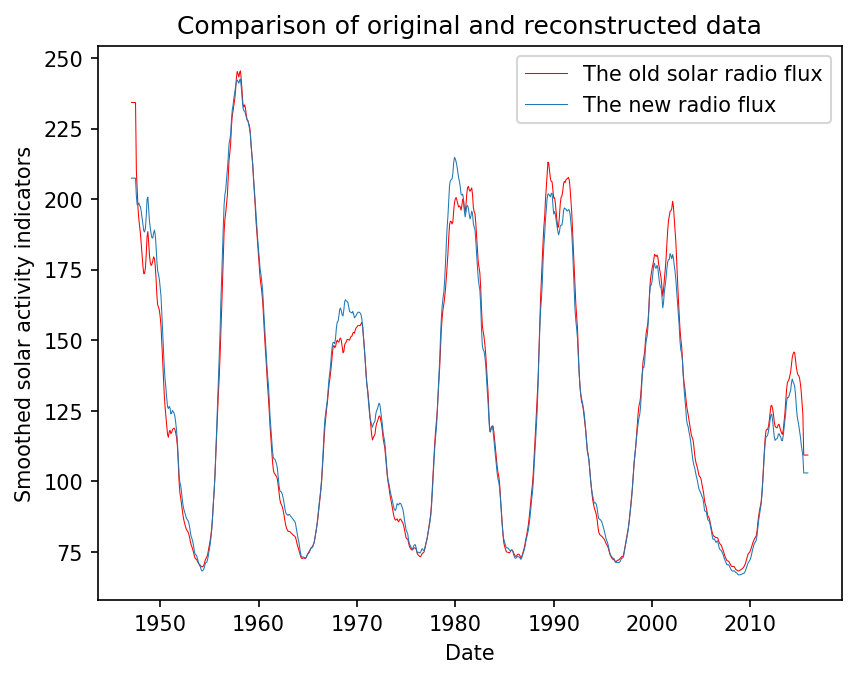

In [510]:
plt.title('Comparison of original and reconstructed data')
#plt.plot(date, data['flux'], color='g',linewidth=0.5)
plt.plot(date, flux_smooth, color='r',linewidth=0.5)
plt.plot(date, F_new, linewidth=0.5)

plt.xlabel('Date')
plt.ylabel('Smoothed solar activity indicators')
plt.legend(labels=['The old solar radio flux', 'The new radio flux'])
plt.show()

9. Determine the variance of the estimation error for the solar radio flux at 10.7 cm

In [511]:
e = F-F_new
sigma = 1/(n-1)*np.sum(e**2)
sigma

38.331836250392925

In [512]:
print("Mean: ", np.mean(F_new))
print("SKO: ", sigma**0.5)

Mean:  127.10847457625215
SKO:  6.19127097213431


Conclusion: In the process of completing the assignment, we learnt how to smooth the experimental data for further work with it. We used running mean method and multidimensional linear regression. The raw data were noisy, i.e. they contained a random component in addition to useful data. In order to reduce it, the data were smoothed by applying a running mean.
When building a linear regression, the square and cube of the smoothed sunspot number were added to the model. However, the coefficients in front of them turned out to be several orders lower than the linear ones. This suggests that the relationship between the radiation flux and sunspot number is predominantly linear.The variance was 38.3. Consequently, the mean square deviation of the obtained model was 6.2, which, with a mean value of 127, indicates a high accuracy of the model.